In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
data = pd.read_csv("BostonHousing.csv")

In [ ]:
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO  LSTAT  MEDV  CAT. MEDV  
0       15.3   4.98  24.0          0  
1       17.8   9.14  21.6          0  
2     

In [ ]:
def compute_cost(X, Y, w, b):
    m = len(Y)
    predictions = np.dot(X, w) + b
    squared_errors = (predictions - Y) ** 2
    cost = (1/(2*m))* np.sum(squared_errors)

    return cost

In [ ]:
def compute_gradient(X, Y, w, b,alpha):
  m = len(Y)
  predictions = np.dot(X,w) + b
  error = predictions - Y
  dj_dw = (1/m) * np.dot(X.T, error) + 2 * alpha * w #2 L2 Regularization
  dj_db = (1/m) * np.sum(error)
  return dj_dw, dj_db

In [ ]:
def gradient_descent (X, Y, w_in, b_in, learning_rate, num_iters, alpha_in):
  m = len(Y)
  w = w_in
  b = b_in
  alpha = alpha_in
  for _ in range(num_iters):
    dj_dw, dj_db = compute_gradient(X, Y, w, b, alpha)
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db
  return w, b

In [ ]:
class MultivariableLinearRegressionModel:
    def __init__(self):
      self.w = 0
      self.b = None
      self.alpha = 0
    def fit (self, X, Y, learning_rate, num_iters, alpha):
      n = X.shape[1]
      self.w = np.zeros(n)
      self.b = 0
      self.apha = alpha
      self.w, self.b = gradient_descent(X, Y, self.w, self.b, learning_rate, num_iters,self.alpha)
    def predict(self, X):
      if self.w is None or self.b is None:
        raise ValueError("Mô hình chưa được huấn luyện. Vui lòng gọi phương thức 'fit' trước.")
      predictions = np.dot(X, self.w) + self.b
      return predictions
    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    def r_squared(y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)


In [ ]:
class MultivariableLinearRegressionOLSModel:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, Y):
        X = np.column_stack((np.ones(len(X)), X))
        self.weights = np.linalg.inv(X.T @ X) @ X.T @ Y
        self.b = self.weights[0]
        self.w = self.weights[1:]
    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        predictions = X @ self.weights
        return predictions

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r_squared(y_true, y_pred):
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_residual / ss_total)


In [ ]:
X = data.drop(columns=["MEDV"], axis=1)
Y = data["MEDV"]



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = MultivariableLinearRegressionModel()
model.fit(X_train, Y_train, learning_rate=5.0e-7, num_iters=100000, alpha = 0.5) #alpha is the regularization parameter


y_predict = model.predict(X_test)


mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mse)
print(f'R-squared: {r2}')


Mean Squared Error: 47.456540691343356
R-squared: 0.3528693237113726


In [ ]:
model = MultivariableLinearRegressionOLSModel()
model.fit(X_train, Y_train)

y_predict = model.predict(X_test)

mse = mean_squared_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mse)
print(f'R-squared: {r2}')

Mean Squared Error: 14.800689134521617
R-squared: 0.7981736588965522


In [ ]:
print("Acutual",Y_test.values)

Acutual [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4]


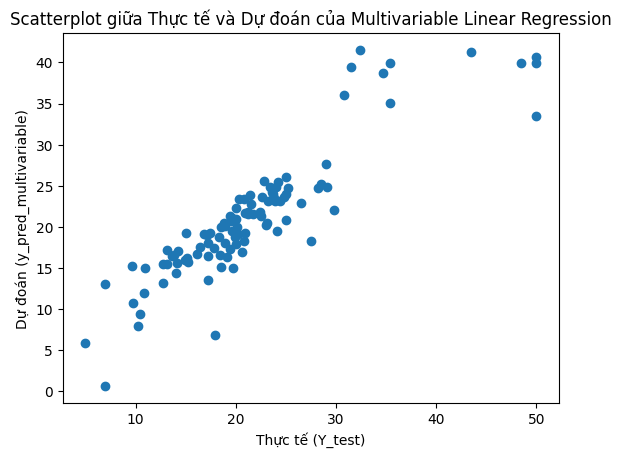

In [ ]:
plt.scatter(Y_test, y_predict)
plt.xlabel("Thực tế (Y_test)")
plt.ylabel("Dự đoán (y_pred_multivariable)")
plt.title("Scatterplot giữa Thực tế và Dự đoán của Multivariable Linear Regression")
plt.show()

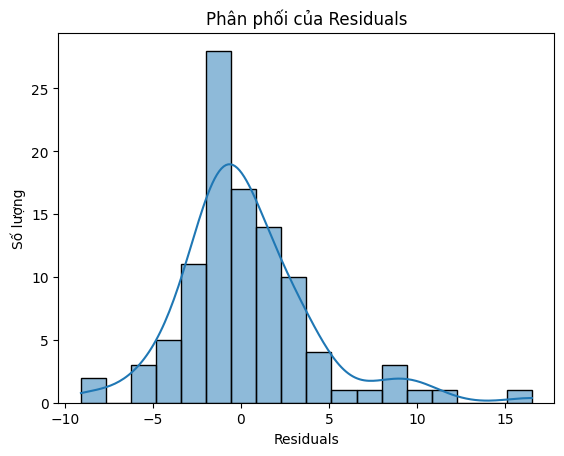

In [ ]:
# Biểu đồ Phân bố Residuals
residuals = Y_test - y_predict
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Số lượng")
plt.title("Phân phối của Residuals")
plt.show()


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 14.800689134522331
R-squared: 0.7981736588965425


In [ ]:
class LogisticRegressionModel:
    def __init__(self):
        self.w = None
        self.b = None
        self.alpha = 0
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, dim):
        self.w = np.zeros((dim, 1))
        self.b = 0

    def gradient_descent(self, X, y):
        m = X.shape[0]
        A = self.sigmoid(np.dot(X, self.w) + self.b)
        cost = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
        dw = 1/m * np.dot(X.T, (A - y))
        db = 1/m * np.sum(A - y)
        return dw, db, cost

    def optimize(self, X, y,learning_rate,epochs,alpha):
        for i in range(epochs):
            dw, db, cost = self.gradient_descent(X, y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
    def fit(self, X, y,learning_rate,epochs,alpha):
        self.initialize_parameters(X.shape[1])
        self.optimize(X, y,learning_rate,epochs,alpha)

    def predict(self, X):
        A = self.sigmoid(np.dot(X, self.w) + self.b)
        predictions = (A >= 0.5).astype(int)
        return predictions

In [ ]:
X = data.drop(columns=["CHAS"], axis=1)
Y = data["CHAS"].values.reshape(-1, 1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình không sử dụng thư viện
model = LogisticRegressionModel()
model.fit(X_train, y_train,learning_rate=5.0e-7, epochs=100000, alpha=0.05)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression without library:")
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Logistic Regression without library:
Accuracy: 0.9411764705882353
Confusion Matrix:
[[96  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        96
           1       0.00      0.00      0.00         6

    accuracy                           0.94       102
   macro avg       0.47      0.50      0.48       102
weighted avg       0.89      0.94      0.91       102



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd

# Giả sử 'data' là DataFrame của bạn
count_chas = data['CHAS'].value_counts()

# In số lượng
print("Số lượng CHAS=0:", count_chas[0])
print("Số lượng CHAS=1:", count_chas[1])


Số lượng CHAS=0: 471
Số lượng CHAS=1: 35


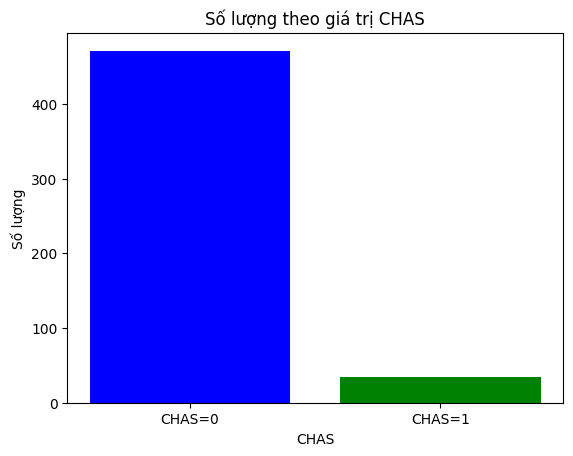

In [ ]:
import matplotlib.pyplot as plt

# Giả sử 'data' là DataFrame của bạn
count_chas = data['CHAS'].value_counts()

# Tạo biểu đồ cột
plt.bar(count_chas.index, count_chas.values, color=['blue', 'green'])
plt.xlabel('CHAS')
plt.ylabel('Số lượng')
plt.title('Số lượng theo giá trị CHAS')
plt.xticks(count_chas.index, ['CHAS=0', 'CHAS=1'])
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd


X = data.drop(columns=["CHAS", "CAT. MEDV"], axis=1)
y = data["CHAS"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

data_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name="CHAS")], axis=1)

In [ ]:
count_chas = data_resampled['CHAS'].value_counts()

# In số lượng
print("Số lượng CHAS=0:", count_chas[0])
print("Số lượng CHAS=1:", count_chas[1])

Số lượng CHAS=0: 471
Số lượng CHAS=1: 471


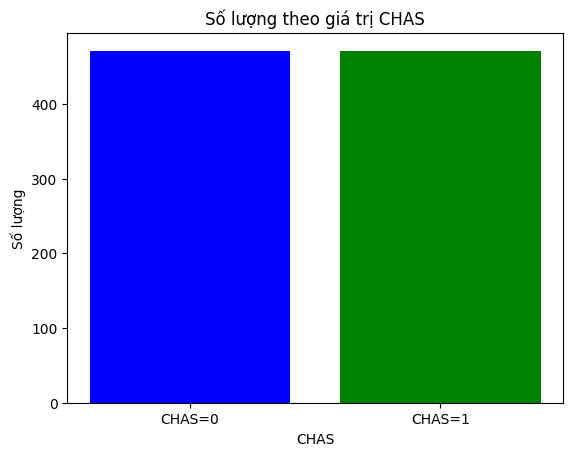

In [ ]:
import matplotlib.pyplot as plt

# Giả sử 'data' là DataFrame của bạn
count_chas = data_resampled['CHAS'].value_counts()

# Tạo biểu đồ cột
plt.bar(count_chas.index, count_chas.values, color=['blue', 'green'])
plt.xlabel('CHAS')
plt.ylabel('Số lượng')
plt.title('Số lượng theo giá trị CHAS')
plt.xticks(count_chas.index, ['CHAS=0', 'CHAS=1'])
plt.show()


In [ ]:
X = data_resampled.drop(columns=["CHAS"], axis=1)
Y = data_resampled["CHAS"].values.reshape(-1, 1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình không sử dụng thư viện
model = LogisticRegressionModel()
model.fit(X_train, y_train,learning_rate=5.0e-7, epochs=100000, alpha=0.05)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Logistic Regression without library:")
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')



Logistic Regression without library:
Accuracy: 0.6825396825396826
Confusion Matrix:
[[53 36]
 [24 76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        89
           1       0.68      0.76      0.72       100

    accuracy                           0.68       189
   macro avg       0.68      0.68      0.68       189
weighted avg       0.68      0.68      0.68       189



In [ ]:
print(data_resampled)

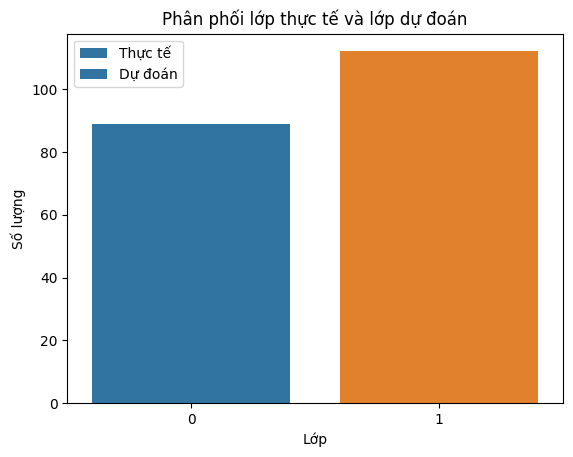

In [ ]:
# Biểu đồ Categorical với Logistic Regression
sns.countplot(x=y_test.squeeze(), label="Thực tế")
sns.countplot(x=y_pred.squeeze(), label="Dự đoán")
plt.xlabel("Lớp")
plt.ylabel("Số lượng")
plt.title("Phân phối lớp thực tế và lớp dự đoán")
plt.legend()
plt.show()

In [ ]:
model_library = LogisticRegression()
model_library.fit(X_train, y_train)

y_pred_library = model_library.predict(X_test)

accuracy_library = accuracy_score(y_test, y_pred_library)
conf_matrix_library = confusion_matrix(y_test, y_pred_library)
classification_rep_library = classification_report(y_test, y_pred_library)

print("\nLogistic Regression with library:")
print(f'Accuracy: {accuracy_library}')
print(f'Confusion Matrix:\n{conf_matrix_library}')
print(f'Classification Report:\n{classification_rep_library}')



Logistic Regression with library:
Accuracy: 0.8465608465608465
Confusion Matrix:
[[70 19]
 [10 90]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.83      0.90      0.86       100

    accuracy                           0.85       189
   macro avg       0.85      0.84      0.84       189
weighted avg       0.85      0.85      0.85       189



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
